In [37]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
data = pd.read_excel("fertility_rate.xlsx", parse_dates=['Year'], index_col='Year')

In [39]:
data.describe()

,"Fertility rate, total (births per woman)"
count,61.000000
mean,6.250410
std,0.413622
min,5.248000
25%,5.985000
50%,6.342000
75%,6.582000
max,6.783000


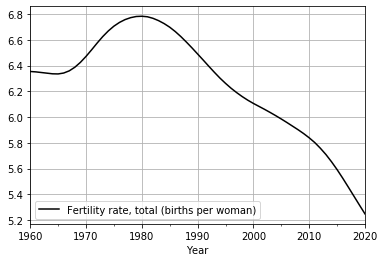

In [40]:
data.plot(grid=True, color='black')
plt.show()

In [41]:
ADF = adfuller(data)
print (ADF)
print ("P-Value is:",ADF[1])

(0.04557060868390286, 0.9621423639764843, 4, 56, {'1%': -3.552928203580539, '5%': -2.9147306250000002, '10%': -2.595137155612245}, -519.4777928131828)
P-Value is: 0.9621423639764843


In [42]:
data_diff1 = data.diff().dropna()

ADF1 = adfuller(data_diff1)
print (ADF1)
print ("P-Value is:",ADF1[1])

(-0.8277291764244452, 0.8108408422607332, 3, 56, {'1%': -3.552928203580539, '5%': -2.9147306250000002, '10%': -2.595137155612245}, -507.79108638910793)
P-Value is: 0.8108408422607332


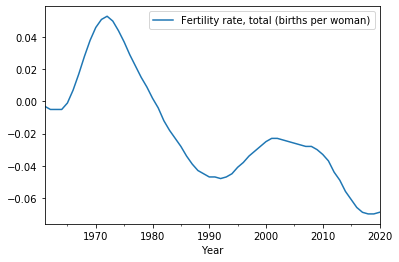

In [43]:
data_diff1.plot()
plt.show()

In [44]:
data_diff2 = data.diff().diff().dropna()

ADF2 = adfuller(data_diff2)
print (ADF2)
print ("P-Value is:",ADF2[1])

(-3.77824066919178, 0.003137954185249189, 2, 56, {'1%': -3.552928203580539, '5%': -2.9147306250000002, '10%': -2.595137155612245}, -496.8147971794149)
P-Value is: 0.003137954185249189


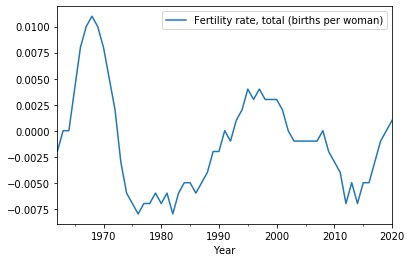

In [45]:
data_diff2.plot()
plt.show()

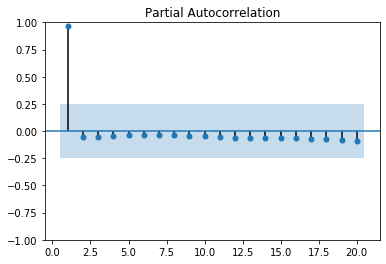

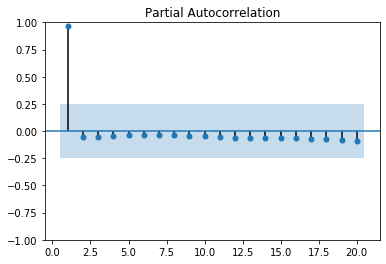

In [46]:
plot_pacf(data, lags=20, zero=False)

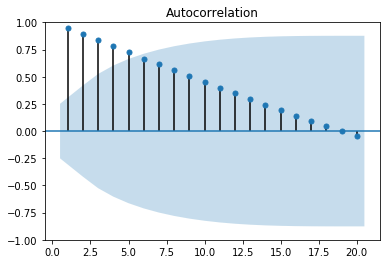

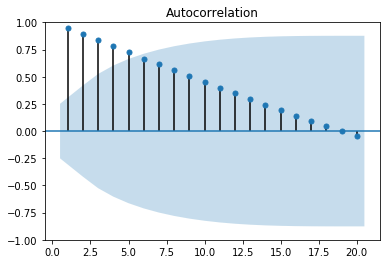

In [47]:
plot_acf(data, lags=20,zero=False)

In [48]:
#Fitting an AR model *SARIMAX
model = SARIMAX(data, order=(1,2,0))
result = model.fit()
print (result.summary())

                                          SARIMAX Results                                           
Dep. Variable:     Fertility rate, total (births per woman)   No. Observations:                   61
Model:                                     SARIMAX(1, 2, 0)   Log Likelihood                 290.651
Date:                                      Fri, 13 May 2022   AIC                           -577.303
Time:                                              08:58:58   BIC                           -573.148
Sample:                                          01-01-1960   HQIC                          -575.681
                                               - 01-01-2020                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9345      0.049  

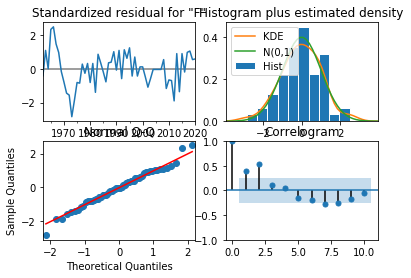

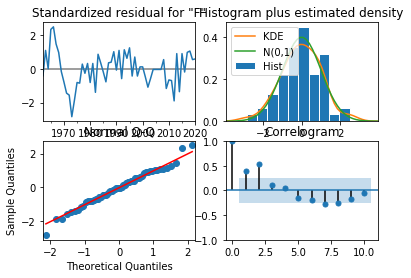

In [49]:
result.plot_diagnostics()

In [50]:
result.aic

-577.3029714030453

In [51]:
result.bic

-573.1478965152338

In [52]:
forecast = result.get_prediction(start=-10)
round(forecast.predicted_mean,3)

2011-01-01    5.803
2012-01-01    5.761
2013-01-01    5.707
2014-01-01    5.655
2015-01-01    5.590
2016-01-01    5.526
2017-01-01    5.455
2018-01-01    5.385
2019-01-01    5.316
2020-01-01    5.247
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [53]:
data.tail(10)

,"Fertility rate, total (births per woman)"
Year,
2011-01-01,5.802
2012-01-01,5.758
2013-01-01,5.709
2014-01-01,5.653
2015-01-01,5.592
2016-01-01,5.526
2017-01-01,5.457
2018-01-01,5.387
2019-01-01,5.317
